In [144]:
# Importing libraries


import PySide

%pylab inline
%matplotlib inline

import pandas as pd 

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import numpy as np

from sklearn import preprocessing
#from sklearn import linear_model
#from sklearn.ensemble import RandomForestClassifier

#from sklearn.metrics import mean_squared_error


#from skll import kappa

from time import time

import warnings
warnings.filterwarnings("ignore")


import os


s = ["Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41",
    "Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5",
     "Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32"]
 

varTypes = dict()


varTypes['categorical'] = s[0].split(', ')
varTypes['continuous'] = s[1].split(', ')
varTypes['discrete'] = s[2].split(', ')
varTypes['dummy'] = ["Medical_Keyword_"+str(i) for i in range(1,49)]





#Import training data 
df = pd.read_csv('prud_files/train.csv')



'''Replacing NaNs with -1 and adding up Medical keywork column

# Get all the columns that have NaNs
a = pd.isnull(d).sum()
nullColumns = a[a>0].index.values

#Determine the min and max values for the NaN columns
a = pd.DataFrame(d, columns=nullColumns).describe()

# Convert all NaNs to -1 and sum up all medical keywords across columns
df = d.fillna(-1)
b = pd.DataFrame(df[varTypes["dummy"]].sum(axis=1), columns=["Medical_Keyword_Sum"])
df= pd.concat([df,b], axis=1, join='outer')

'''
# Sum and collapse medical_keyword1-48 features

b = pd.DataFrame(df[varTypes["dummy"]].sum(axis=1), columns=["Medical_Keyword_Sum"])
df= pd.concat([df,b], axis=1, join='outer')

## Extract key columns for normalization

df_n = df.copy()

# Retrieve all dummy vars from Product_Info_2 

a = pd.get_dummies(df["Product_Info_2"]).columns.tolist()
norm_PI2_dict = dict()

#Create an enumerated dictionary of Product Info 2 categories

i=1
for c in a:
    norm_PI2_dict.update({c:i})
    i+=1 

df_n = df_n.replace(to_replace={'Product_Info_2':norm_PI2_dict})
df_n = df_n.replace(to_replace={'Product_Info_2':norm_PI2_dict})



# normalizes a single dataframe column and returns the result

def normalize_df(d):
    min_max_scaler = preprocessing.MinMaxScaler()
    x = d.values.astype(np.float)
    return min_max_scaler.fit_transform(x)

df_n.Response = normalize_df(df_n.Response)


#Normalize relevant columns
'''

df_train_n = df_train_n[["Response"]+varTypes["categorical"]+varTypes["discrete"]]
df_test_n = df_test_n[["Response"]+varTypes["categorical"]+varTypes["discrete"]]

for col in df_train_n:
    df_train_n[col] = normalize_df(df_train_n[col])
for col in df_test_n:
    df_test_n[col] = normalize_df(df_test_n[col])
    
#Combine cells together



'''




#df_n is normalized, df is categorical


df_n = pd.concat(
        [pd.DataFrame(df.Id),
        pd.DataFrame(df['Response']),
        pd.DataFrame(df_n['Product_Info_2']),
        pd.DataFrame(df['Medical_Keyword_Sum']),
        pd.DataFrame(df[varTypes['continuous']])], 
        axis=1, 
        join='outer')

             

print "Ready for Modelling"
# Group by risk categories

print df_n.columns.tolist()

# Taking partial sample for faster processing

df_n_gb = df_n.groupby("Response")



'''
df_n_test = pd.DataFrame()
for name, group in df_n_gb:

    g = group[:len(group)/100]
    df_n_test = pd.concat([df_n_test, g], axis=0, join='outer')

'''



# Output data frame!!



Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Ready for Modelling
['Id', 'Response', 'Product_Info_2', 'Medical_Keyword_Sum', 'Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5']


"\ndf_n_test = pd.DataFrame()\nfor name, group in df_n_gb:\n\n    g = group[:len(group)/100]\n    df_n_test = pd.concat([df_n_test, g], axis=0, join='outer')\n\n"

# Output Scatter matrix

![caption](images/scatter_matrix/Response_scatter_matrix_2016-03-06.png)


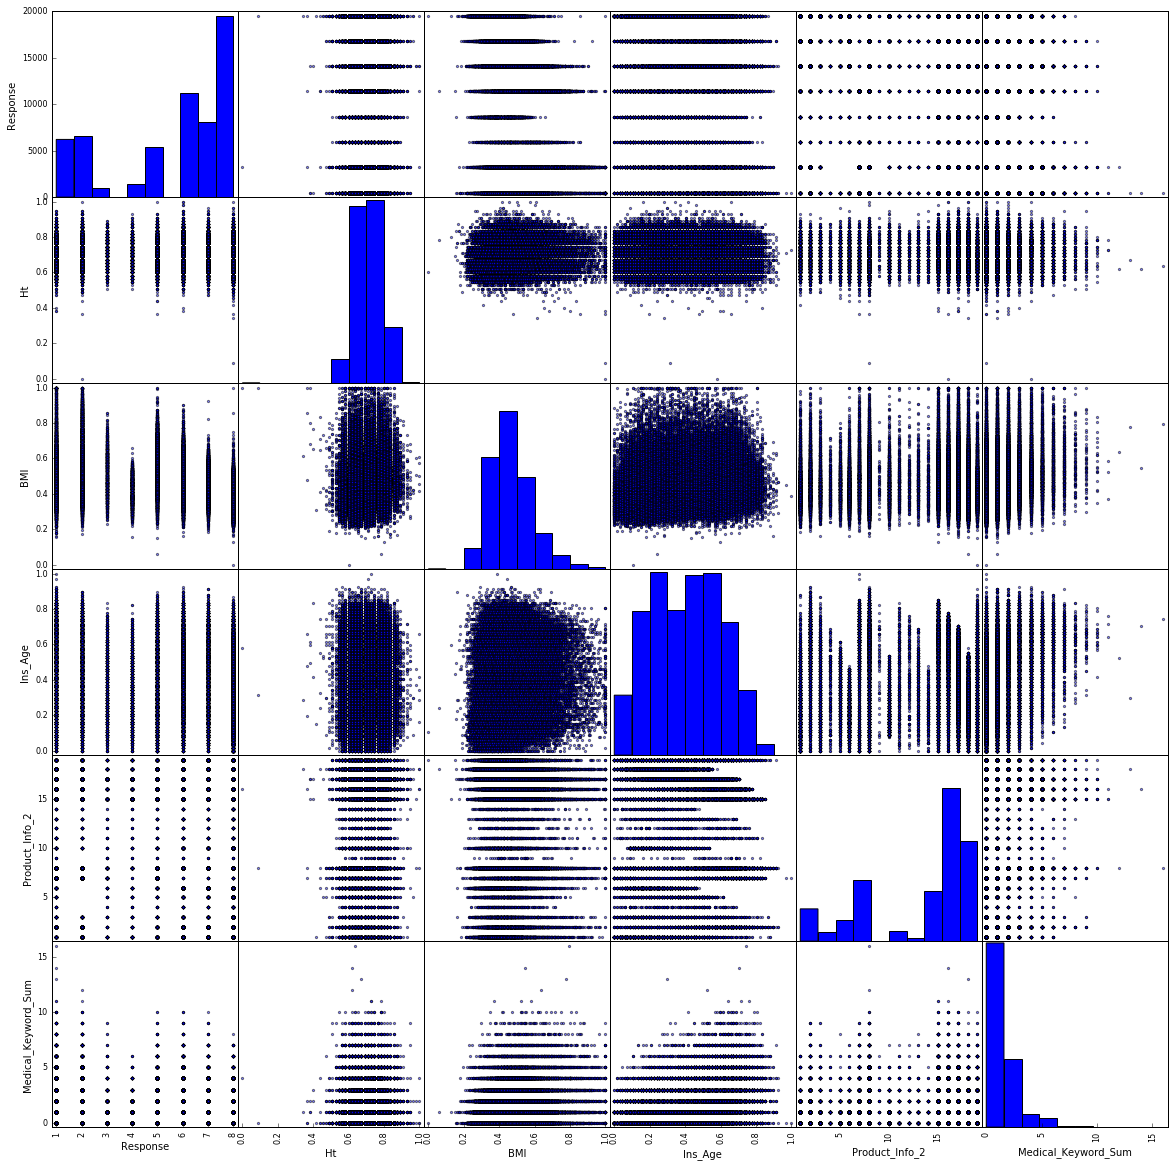

In [145]:
# Plot the risk response 

from pandas.tools import plotting

plt.figure(0, figsize=[20,20])

# Ratings are horizontal
# Features on Y-axis

cat=  ['Response','Ht','BMI','Ins_Age','Product_Info_2','Medical_Keyword_Sum']

#plt.title(" Scatter Matrix"+str(name))
plotting.scatter_matrix(df_n[cat], figsize=(20,20))

directory = 'images/scatter_matrix/'

if not os.path.exists(directory):
    os.makedirs(directory)


file_string = directory+'Response_scatter_matrix_2016-03-06.png'

print ("![caption]("+file_string+")")

plt.savefig(file_string)



plt.show()
        
                            

# Output histograms 

In [147]:

i=0

g = df_n.groupby('Response')

#BMI, Ht, Ins_Age, Product_Info_2, Wt

'''


df_n_test = pd.DataFrame()

for name, group in df_n_gb:

    g = group[:len(group)/100]
    df_n_test = pd.concat([df_n_test, g], axis=0, join='outer')
    
g = df_n_test.groupby('Response')


'''


features =  ['Ht','BMI','Ins_Age','Product_Info_2','Medical_Keyword_Sum']

i=0


for cat in features:


    for name, group in g:


        plt.figure(i, figsize=[5,5])

        # Ratings are horizontal
        # Features on Y-axis

        plt.title(str(cat)+" Histogram for Risk Response Rating "+str(name))
        plt.hist(group[cat])
        plt.ylabel('Count')

        plt.xlabel(str(cat))

        directory = 'images/'+str(cat)+'/'

        if not os.path.exists(directory):
            os.makedirs(directory)
            
            
        file_string = directory+str(name)+'_hist_Response_'+str(cat)+'_-2016-03-06.png'
        print ("![caption]("+file_string+")")
        
        #plt.savefig(file_string)



        plt.show()

        i+=1

![caption](images/Ht/1_hist_Response_Ht_-2016-03-06.png)
![caption](images/Ht/2_hist_Response_Ht_-2016-03-06.png)
![caption](images/Ht/3_hist_Response_Ht_-2016-03-06.png)
![caption](images/Ht/4_hist_Response_Ht_-2016-03-06.png)
![caption](images/Ht/5_hist_Response_Ht_-2016-03-06.png)
![caption](images/Ht/6_hist_Response_Ht_-2016-03-06.png)
![caption](images/Ht/7_hist_Response_Ht_-2016-03-06.png)
![caption](images/Ht/8_hist_Response_Ht_-2016-03-06.png)
![caption](images/BMI/1_hist_Response_BMI_-2016-03-06.png)
![caption](images/BMI/2_hist_Response_BMI_-2016-03-06.png)
![caption](images/BMI/3_hist_Response_BMI_-2016-03-06.png)
![caption](images/BMI/4_hist_Response_BMI_-2016-03-06.png)
![caption](images/BMI/5_hist_Response_BMI_-2016-03-06.png)
![caption](images/BMI/6_hist_Response_BMI_-2016-03-06.png)
![caption](images/BMI/7_hist_Response_BMI_-2016-03-06.png)
![caption](images/BMI/8_hist_Response_BMI_-2016-03-06.png)
![caption](images/Ins_Age/1_hist_Response_Ins_Age_-2016-03-06.png)
![cap

In [ ]:
''' Tried playing with hexbin plots... TODO: Plot Response Rating vs different features

g = df_n_test.groupby('Response')

cat = 'Ht'


plt.figure(0, figsize=[5,5])

plt.title(str(cat)+" Hexbin plot for Risk Response Rating")


df_n_test.plot(kind='kde', x='Response', y=cat, gridsize=25)

plt.ylabel(cat)

plt.xlabel('Response')

#plt.savefig('images/'+str(name)+'_hist_Response-2016-03-06.png')

    

plt.show()

i+=1    
'''


'''
plt.figure(0)
plt.subplot(121)
plt.title("Categorical - Histogram for Risk Response")
plt.xlabel("Risk Response (1-7)")
plt.ylabel("Frequency")
plt.hist(df.Response)
plt.savefig('images/hist_Response.png')
print df.Response.describe()
print ""

'''